# World Scope Geographic Sales Breakdown

This model uses Worldscope Geographic Segment data for sales to display the key countries and regions for the constituents of an index. The template then aggregates the data so users can see the breakdown for the index itself.

In [1]:
#Imporint Eikon and Main Modules

import eikon as ek
import configparser as cp
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as tick
from matplotlib.ticker import FuncFormatter


warnings.filterwarnings('ignore')

You should save a text file with **filename** `eikon.cfg` having the following contents:

    [eikon]
    app_id = YOUR_APP_ID_HERE
    
This file should be readily availble (e.g. in the current working directory) for the next steps.

In [2]:
cfg = cp.ConfigParser()
cfg.read('eikon.cfg')  # adjust for different file location

['eikon.cfg']

In [3]:
ek.set_app_key(cfg['eikon']['app_id']) #set_app_id function being deprecated

## Data API Fields

The fields providing geographic breakdown of the company's fundamentals are
- ```TR.BGS.GeoTotalRevenue```
- ```TR.BGS.GeoTotalRevenue.segmentName```

### TR.BGS.GeoTotalRevenue
Geographic Total Revenues (Calculated). 
* Value unit: Millions

### Nintendo 

RIC: 7974.T

In [4]:
df,err = ek.get_data('7974.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])

In [5]:
#df.columns

In [6]:
df_nintendo = df.copy()

df_nintendo.rename(columns={'Instrument':'RIC',
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Sales in £m'},
         inplace = True)

df_nintendo

,RIC,Geographic,Sales in £m
0,7974.T,Japan,265722000000
1,7974.T,Americas,528895000000
2,7974.T,Europe,304552000000
3,7974.T,Other Foreign,101389000000
4,7974.T,Segment Total,1200558000000
5,7974.T,Consolidated Total,1200558000000


In [7]:
total_sale = df_nintendo.iloc[df_nintendo.shape[0] - 1]["Sales in £m"]

In [8]:
df_nintendo = df_nintendo[df_nintendo["Geographic"] != "Segment Total"]
df_nintendo = df_nintendo[df_nintendo["Geographic"] != "Consolidated Total"]

In [9]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-11)

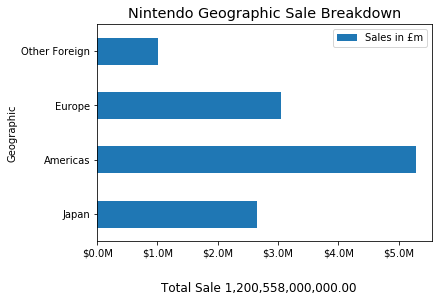

In [10]:
# Graph

df_nintendo.set_index("Geographic",drop=True,inplace=True)



fig = plt.figure()
fig.text(.5, -.05, "Total Sale %s" %(f"{total_sale:,.2f}"), ha="center",fontsize="large")

plt.ticklabel_format(style = 'plain')
plt.title('Nintendo Geographic Sale Breakdown', color='black',fontsize="x-large")
ax = fig.gca()

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)

df_nintendo.plot(kind='barh', ax = fig.gca())
plt.show()

### Sony
RIC: 6758.T

In [11]:
df,err = ek.get_data('6758.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,6758.T,Japan,2591784000000
1,6758.T,United States,1982135000000
2,6758.T,Europe,1862166000000
3,6758.T,China,770416000000
4,6758.T,Other Regions,546993000000
5,6758.T,Asia/Oceania,912193000000
6,6758.T,Segment Total,8665687000000
7,6758.T,Consolidated Total,8665687000000


In [12]:
df_sony = df.copy()

df_sony.rename(columns={'Instrument':'RIC',
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Sales in £m'},
         inplace = True)
df_sony

,RIC,Geographic,Sales in £m
0,6758.T,Japan,2591784000000
1,6758.T,United States,1982135000000
2,6758.T,Europe,1862166000000
3,6758.T,China,770416000000
4,6758.T,Other Regions,546993000000
5,6758.T,Asia/Oceania,912193000000
6,6758.T,Segment Total,8665687000000
7,6758.T,Consolidated Total,8665687000000


In [13]:
total_sale = df_sony.iloc[df_sony.shape[0] - 1]["Sales in £m"]

In [14]:
df_sony = df_sony[df_sony["Geographic"] != "Segment Total"]
df_sony = df_sony[df_sony["Geographic"] != "Consolidated Total"]

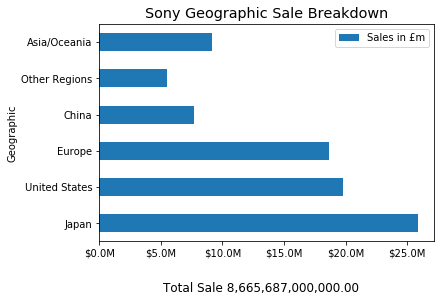

In [15]:
# Graph

df_sony.set_index("Geographic",drop=True,inplace=True)

fig = plt.figure()
fig.text(.5, -.05, "Total Sale %s" %(f"{total_sale:,.2f}"), ha="center",fontsize="large")

plt.ticklabel_format(style = 'plain')
plt.title('Sony Geographic Sale Breakdown', color='black',fontsize="x-large")
ax = fig.gca()

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)

df_sony.plot(kind='barh', ax = fig.gca())
plt.show()

### SEGA

RIC: 6460.T

In [16]:
df,err = ek.get_data('6460.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,6460.T,Japan,277903000000
1,6460.T,Northern America,33373000000
2,6460.T,Europe,10937000000
3,6460.T,Other,9433000000
4,6460.T,Segment Total,331646000000
5,6460.T,Consolidated Total,331646000000


In [17]:
df_sega = df.copy()

df_sega.rename(columns={'Instrument':'RIC',
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Sales in £m'},
         inplace = True)
df_sega

,RIC,Geographic,Sales in £m
0,6460.T,Japan,277903000000
1,6460.T,Northern America,33373000000
2,6460.T,Europe,10937000000
3,6460.T,Other,9433000000
4,6460.T,Segment Total,331646000000
5,6460.T,Consolidated Total,331646000000


In [18]:
total_sale = df_sega.iloc[df_sega.shape[0] - 1]["Sales in £m"]

In [19]:
df_sega = df_sega[df_sega["Geographic"] != "Segment Total"]
df_sega = df_sega[df_sega["Geographic"] != "Consolidated Total"]

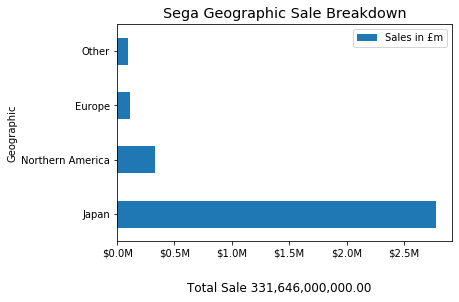

In [20]:
# Graph

df_sega.set_index("Geographic",drop=True,inplace=True)

fig = plt.figure()
fig.text(.5, -.05, "Total Sale %s" %(f"{total_sale:,.2f}"), ha="center",fontsize="large")

plt.ticklabel_format(style = 'plain')
plt.title('Sega Geographic Sale Breakdown', color='black',fontsize="x-large")
ax = fig.gca()

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)

df_sega.plot(kind='barh', ax = fig.gca())
plt.show()

### Konami

RIC: 9766.T

In [21]:
df,err = ek.get_data('9766.T', ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,9766.T,Japan,201775000000
1,9766.T,Europe,12890000000
2,9766.T,Asia/Oceania,7537000000
3,9766.T,Americas,40347000000
4,9766.T,Segment Total,262549000000
5,9766.T,Consolidated Total,262549000000


In [22]:
df_konami = df.copy()

df_konami.rename(columns={'Instrument':'RIC',
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Sales in £m'},
         inplace = True)
df_konami

,RIC,Geographic,Sales in £m
0,9766.T,Japan,201775000000
1,9766.T,Europe,12890000000
2,9766.T,Asia/Oceania,7537000000
3,9766.T,Americas,40347000000
4,9766.T,Segment Total,262549000000
5,9766.T,Consolidated Total,262549000000


In [23]:
total_sale = df_konami.iloc[df_konami.shape[0] - 1]["Sales in £m"]

In [24]:
df_konami = df_konami[df_konami["Geographic"] != "Segment Total"]
df_konami = df_konami[df_konami["Geographic"] != "Consolidated Total"]

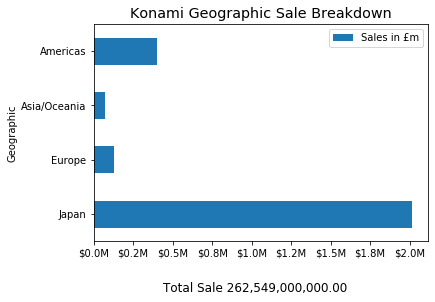

In [25]:
# Graph

df_konami.set_index("Geographic",drop=True,inplace=True)

fig = plt.figure()
fig.text(.5, -.05, "Total Sale %s" %(f"{total_sale:,.2f}"), ha="center",fontsize="large")

plt.ticklabel_format(style = 'plain')
plt.title('Konami Geographic Sale Breakdown', color='black',fontsize="x-large")
ax = fig.gca()

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)

df_konami.plot(kind='barh', ax = fig.gca())
plt.show()